# B1 All Test-Train-S50F-DNN  with Manual Scale&ModelFit


Baseline Neural Network Model Performance

In [69]:
xseed=7

from numpy.random import seed
seed(xseed)
from tensorflow import set_random_seed
set_random_seed(xseed)

In [70]:
 # Binary Classification with Sonar Dataset: Baseline
import numpy
import pandas


from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import EarlyStopping

from keras.utils import to_categorical


from keras.layers import Dropout
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.optimizers import SGD
from keras.optimizers import Adadelta
from keras.constraints import maxnorm

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

import joblib

import os
from datetime import datetime

import matplotlib.pyplot as pyplot

from sklearn.metrics import accuracy_score

import tensorflow 
import keras

In [71]:
print(tensorflow.__version__)
print(keras.__version__)

1.14.0
2.3.1


In [72]:
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

In [73]:
result_path=os.path.abspath(r'D:\JupyterCode\MyDev\AlgoTradingProject\ML-S50F\Lab-S5-F-DNN\results')
model_path=os.path.abspath(r'D:\JupyterCode\MyDev\AlgoTradingProject\ML-S50F\Lab-S5-F-DNN\models')

In [74]:
st='2007'
ed='2018'

test_st='2019'
test_ed='2020'

strategyName='long'

# Load  Data

In [75]:
filename='ML-Long_S50M15_07To2Q20-Train_Ori.csv'
filepath=os.path.abspath(f'D:\\DataSets\\ML_LS\\Version\\{filename}')
print(filepath)


D:\DataSets\ML_LS\Version\ML-Long_S50M15_07To2Q20-Train_Ori.csv


In [76]:
def CreateData(dfx,labelCol):
 
 X_df_temp =dfx.drop(columns=['open','high','low','close',labelCol])
 Y_df_temp = dfx[labelCol]

 Xtemp=X_df_temp.to_numpy()
 ytemp=Y_df_temp.to_numpy()

 return X_df_temp,Y_df_temp, Xtemp,ytemp

In [77]:
def PlotModelEvaluation(histModel): 
 pyplot.figure(figsize=(12,8))

 # plot loss learning curves
 pyplot.subplot(211)
 pyplot.title('Cross-Entropy Loss', pad=-40)
 pyplot.plot(histModel.history['loss'], label='train')
 pyplot.plot(histModel.history['val_loss'], label='test')
 pyplot.legend()

# plot accuracy learning curves
 pyplot.subplot(212)
 pyplot.title('Accuracy', pad=-40)
 pyplot.plot(histModel.history['accuracy'], label='train')
 pyplot.plot(histModel.history['val_accuracy'], label='test')
 pyplot.legend()

 pyplot.show()

# Load All Data

In [78]:
# load dataset

dataframe = pandas.read_csv(filepath,index_col="datetime", parse_dates=['datetime'],dayfirst=True)

print(dataframe.info())
dataframe.shape

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 70896 entries, 2007-01-03 09:45:00 to 2020-06-30 16:45:00
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   open                    70896 non-null  float64
 1   high                    70896 non-null  float64
 2   low                     70896 non-null  float64
 3   close                   70896 non-null  float64
 4   indy_ma-550             70896 non-null  float64
 5   indy_ma-1100            70896 non-null  float64
 6   indy_hh-550             70896 non-null  float64
 7   indy_ll-550             70896 non-null  float64
 8   indy_mid-550            70896 non-null  float64
 9   indy_hh2-1100           70896 non-null  float64
 10  indy_ll2-1100           70896 non-null  float64
 11  indy_mid2-1100          70896 non-null  float64
 12  indy_macd110-440        70896 non-null  float64
 13  indy_signal110-440-110  70896 non-null  float64
 14  ind

(70896, 22)

In [79]:
labelName=dataframe.columns[-1]
labelName

'LongSignal'

# Train Data

In [80]:
df=dataframe[st:ed]
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 62755 entries, 2007-01-03 09:45:00 to 2018-12-28 16:45:00
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   open                    62755 non-null  float64
 1   high                    62755 non-null  float64
 2   low                     62755 non-null  float64
 3   close                   62755 non-null  float64
 4   indy_ma-550             62755 non-null  float64
 5   indy_ma-1100            62755 non-null  float64
 6   indy_hh-550             62755 non-null  float64
 7   indy_ll-550             62755 non-null  float64
 8   indy_mid-550            62755 non-null  float64
 9   indy_hh2-1100           62755 non-null  float64
 10  indy_ll2-1100           62755 non-null  float64
 11  indy_mid2-1100          62755 non-null  float64
 12  indy_macd110-440        62755 non-null  float64
 13  indy_signal110-440-110  62755 non-null  float64
 14  ind

# Test Data

In [81]:
'''
dataframe_test = pandas.read_csv(filepath_test,index_col="datetime", parse_dates=['datetime'],dayfirst=True)
df_test=dataframe_test[test_st:test_ed]
'''
df_test=dataframe[test_st:test_ed]
df_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8141 entries, 2019-01-02 09:45:00 to 2020-06-30 16:45:00
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   open                    8141 non-null   float64
 1   high                    8141 non-null   float64
 2   low                     8141 non-null   float64
 3   close                   8141 non-null   float64
 4   indy_ma-550             8141 non-null   float64
 5   indy_ma-1100            8141 non-null   float64
 6   indy_hh-550             8141 non-null   float64
 7   indy_ll-550             8141 non-null   float64
 8   indy_mid-550            8141 non-null   float64
 9   indy_hh2-1100           8141 non-null   float64
 10  indy_ll2-1100           8141 non-null   float64
 11  indy_mid2-1100          8141 non-null   float64
 12  indy_macd110-440        8141 non-null   float64
 13  indy_signal110-440-110  8141 non-null   float64
 14  indy

In [82]:
dfOHLC=df_test.loc[:,['open','high','low','close']]

# Create Train Test Data for ML

In [83]:
X_df,y_df,X_train,y_train=CreateData(df,labelName)
Xtest_df,ytest_df,X_test,y_test=CreateData(df_test,labelName)

In [84]:
print(y_df.tail(3))
print(ytest_df.tail(3))

print("++++++++++++++++++++++++++++++++++++++++++++++++++++++")

print(y_train[:10])
print(y_test[:10])

print("++++++++++++++++++++++++++++++++++++++++++++++++++++++")
display('X_df.tail(3)','Xtest_df.tail(3)')

datetime
2018-12-28 16:15:00    0
2018-12-28 16:30:00    0
2018-12-28 16:45:00    0
Name: LongSignal, dtype: int64
datetime
2020-06-30 16:15:00    0
2020-06-30 16:30:00    0
2020-06-30 16:45:00    0
Name: LongSignal, dtype: int64
++++++++++++++++++++++++++++++++++++++++++++++++++++++
[0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0]
++++++++++++++++++++++++++++++++++++++++++++++++++++++


,indy_ma-550,indy_ma-1100,indy_hh-550,indy_ll-550,indy_mid-550,indy_hh2-1100,indy_ll2-1100,indy_mid2-1100,indy_macd110-440,indy_signal110-440-110,indy_hist_macd110-440,indy_rsi25-ma20,indy_6ATRTrail_DC-110,cate_3trend-550_ma110,cate_2trend-1100_ma220,cate_rannkHL1100-ma66,cate_CombineTrend
datetime,,,,,,,,,,,,,,,,,
2018-12-28 16:15:00,1076.66,1085.30,1123.2,1022.6,1072.9,1125.0,1022.6,1073.8,-29.61,-24.48,-5.13,43.43,1051.53,1,0,3,2
2018-12-28 16:30:00,1076.60,1085.23,1123.2,1022.6,1072.9,1125.0,1022.6,1073.8,-29.75,-24.56,-5.19,43.98,1050.89,1,0,3,2
2018-12-28 16:45:00,1076.53,1085.16,1123.2,1022.6,1072.9,1125.0,1022.6,1073.8,-29.81,-24.64,-5.17,44.65,1049.59,1,0,3,2
,indy_ma-550,indy_ma-1100,indy_hh-550,indy_ll-550,indy_mid-550,indy_hh2-1100,indy_ll2-1100,indy_mid2-1100,indy_macd110-440,indy_signal110-440-110,indy_hist_macd110-440,indy_rsi25-ma20,indy_6ATRTrail_DC-110,cate_3trend-550_ma110,cate_2trend-1100_ma220,cate_rannkHL1100-ma66,cate_CombineTrend
datetime,,,,,,,,,,,,,,,,,
2020-06-30 16:15:00,908.09,880.38,977.9,855.5,916.7,977.9,796.5,887.2,-33.54,-23.34,-10.20,57.93,882.16,2,1,4,3
2020-06-30 16:30:00,908.09,880.43,977.9,855.5,916.7,977.9,796.5,887.2,-33.66,-23.54,-10.12,57.28,882.04,2,1,4,3
2020-06-30 16:45:00,908.07,880.49,977.9,855.5,916.7,977.9,796.5,887.2,-33.78,-23.74,-10.04,56.61,882.15,2,1,4,3


# Scale Data

In [85]:
#scaler=StandardScaler().fit(X_train)
#print(scaler.mean_)
#print(scaler.var_)


scaler=MinMaxScaler().fit(X_train)
print(scaler.data_max_)
print(scaler.data_min_)


Xtrain_scaled=scaler.transform(X_train)
Xtest_scaled=scaler.transform(X_test)

print("++++++++++++++++++++++++++++++++++++++++++++++++++++++")
print("After scaled train \n",Xtrain_scaled[:2])
print("After scaled test \n",X_test[:2])


[1.18559e+03 1.17934e+03 1.22190e+03 1.16270e+03 1.19230e+03 1.22190e+03
 1.13400e+03 1.17795e+03 6.82300e+01 6.17600e+01 3.65100e+01 8.19100e+01
 1.20909e+03 3.00000e+00 1.00000e+00 4.00000e+00 4.00000e+00]
[286.07 292.29 305.4  254.   289.8  310.7  254.   292.45 -68.78 -64.34
 -34.04  20.08 257.92   1.     0.     1.     1.  ]
++++++++++++++++++++++++++++++++++++++++++++++++++++++
After scaled train 
 [[0.24194015 0.24402232 0.24178942 0.17717619 0.20077562 0.23869622
  0.18295455 0.20231508 0.33778556 0.29452815 0.5491141  0.3077794
  0.22708874 0.         0.         0.66666667 0.33333333]
 [0.24185121 0.2439885  0.24178942 0.17717619 0.20077562 0.23869622
  0.18295455 0.20231508 0.33778556 0.29460745 0.54883062 0.30680899
  0.22679437 0.         0.         0.66666667 0.33333333]]
After scaled test 
 [[ 1.07648e+03  1.08509e+03  1.12320e+03  1.02260e+03  1.07290e+03
   1.12500e+03  1.02260e+03  1.07380e+03 -2.98400e+01 -2.47200e+01
  -5.12000e+00  4.53900e+01  1.04931e+03  1.00000e+0

In [86]:
#for categorical_crossentropy and softmax
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

print("X-Train ",Xtrain_scaled.shape)

print("X-Test ",Xtest_scaled.shape)

print("y-Train ",y_train.shape)

print("y-Test ",y_test.shape)

X-Train  (62755, 17)
X-Test  (8141, 17)
y-Train  (62755, 2)
y-Test  (8141, 2)


In [87]:
print(X_train[:3])
print(Xtrain_scaled[:3])

print(y_train[:5])

[[503.7  508.75 527.   415.   471.   528.2  415.   471.6  -22.5  -27.2
    4.7   39.11 473.92   1.     0.     3.     2.  ]
 [503.62 508.72 527.   415.   471.   528.2  415.   471.6  -22.5  -27.19
    4.68  39.05 473.64   1.     0.     3.     2.  ]
 [503.52 508.68 527.   415.   471.   528.2  415.   471.6  -22.53 -27.17
    4.64  38.91 473.48   1.     0.     3.     2.  ]]
[[0.24194015 0.24402232 0.24178942 0.17717619 0.20077562 0.23869622
  0.18295455 0.20231508 0.33778556 0.29452815 0.5491141  0.3077794
  0.22708874 0.         0.         0.66666667 0.33333333]
 [0.24185121 0.2439885  0.24178942 0.17717619 0.20077562 0.23869622
  0.18295455 0.20231508 0.33778556 0.29460745 0.54883062 0.30680899
  0.22679437 0.         0.         0.66666667 0.33333333]
 [0.24174004 0.24394341 0.24178942 0.17717619 0.20077562 0.23869622
  0.18295455 0.20231508 0.3375666  0.29476606 0.54826364 0.30454472
  0.22662616 0.         0.         0.66666667 0.33333333]]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


# Model Configuration &Definition 

In [88]:
h1=17
h2=17
h3=0

input_n=X_train.shape[1]


#105
xpoch=110

#Epoch 107: early stopping
xbatch=32

#kernelInit='he_uniform'
#kernelInit='he_normal'
#kernel_initializer="glorot_uniform"  #default

patience_from_epoch=round( xpoch*0.5)

print("Input-N =",input_n)
print('Epochs=',xpoch)
print('Batch_size=',xbatch)
print('Patience from epochs',patience_from_epoch )

modelSelect=''

modelHD_Title=f'{h1}x{h2}x{h3}_epo{xpoch}_btch{xbatch}'
print(modelHD_Title)

Input-N = 17
Epochs= 110
Batch_size= 32
Patience from epochs 55
17x17x0_epo110_btch32


In [89]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=patience_from_epoch)


In [90]:
def ModelBased():

 xmodel = Sequential()  
  
 xmodel.add(Dense(h1, input_dim=input_n,activation='relu' ))
 xmodel.add(Dense(h2,activation='relu'))
 #xmodel.add(Dense(h3,activation='relu'))
 
 xmodel.add(Dense(1, activation='sigmoid'))
  

 xmodel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

 return xmodel


In [91]:
#Classical ฺฺGeneralization

def ModelByRegularL2():
    
    l2_val=0.00100000
    model_tuneL2 = Sequential() 
    
    model_tuneL2.add(Dense(h1, input_dim=input_n ,activation='relu',kernel_regularizer=l2(l2_val) ))   
    model_tuneL2.add(Dense(h2, activation='relu',kernel_regularizer=l2(l2_val)))
    #model_tuneL2.add(Dense(h3, activation='relu',kernel_regularizer=l2(l2_val)))
    
    model_tuneL2.add(Dense(1, activation='sigmoid'))
  

    model_tuneL2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model_tuneL2

In [92]:
#Modern ฺฺGeneralization
def ModelByWConstr_Dropout():
        
    dropoutModel = Sequential()
    
    param_dropout=0.02
    vaMaxNorm_WC=4
    
    #input
    dropoutModel.add(Dropout(param_dropout, input_shape=(input_n,)))
    
    #layer#1
    dropoutModel.add(Dense(h1, activation="relu", kernel_constraint=maxnorm(vaMaxNorm_WC)))
    dropoutModel.add(Dropout(param_dropout))
    
    #layer#2
    dropoutModel.add(Dense(h2, activation="relu", kernel_constraint=maxnorm(vaMaxNorm_WC)))
    dropoutModel.add(Dropout(param_dropout))
    

    dropoutModel.add(Dense(1, activation="sigmoid"))
    
    dropoutModel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return dropoutModel

In [93]:
def ModelByAllTuning():
    model_x=Sequential()
    
    param_dropout=0.02
    vaMaxNorm_WC=4
    
     #l2_val=0.01 #0.865 vs 0.851
    l2_val=0.00100000 #0.93 vs 0.84
    
     #input
    model_x.add(Dropout(param_dropout, input_shape=(input_n,)))
    
    #layer#1
    model_x.add(Dense(h1,activation="relu", kernel_constraint=maxnorm(vaMaxNorm_WC),kernel_regularizer=l2(l2_val)))
    #model_x.add(Dense(h1, kernel_initializer=kernelInit,activation="relu", kernel_constraint=maxnorm(vaMaxNorm_WC),kernel_regularizer=l2(l2_val)))
    model_x.add(Dropout(param_dropout))
    
    #layer#2
    model_x.add(Dense(h2, activation="relu", kernel_constraint=maxnorm(vaMaxNorm_WC),kernel_regularizer=l2(l2_val)))
    #model_x.add(Dense(h2,kernel_initializer=kernelInit, activation="relu", kernel_constraint=maxnorm(vaMaxNorm_WC),kernel_regularizer=l2(l2_val)))
    model_x.add(Dropout(param_dropout))
    
    if y_train.ndim==2: # Convert to multil classification
     print("# Convert to multil classification")
     model_x.add(Dense(2, activation='softmax'))
     model_x.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    else :
     model_x.add(Dense(1, activation="sigmoid"))  
     model_x.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    

    
    return model_x

# Fit , Evaluate and Plot Result

In [94]:
isEarlyStop=False

In [95]:

#model=ModelBased()
#model=ModelByRegularL2()
#model=ModelByWConstr_Dropout()

model=ModelByAllTuning()

if isEarlyStop==True:
 print("Use EarlyStopping")
 history_model=model.fit(Xtrain_scaled,y_train,validation_data=(Xtest_scaled,y_test),
                        epochs=xpoch,batch_size=xbatch,callbacks=[es])
else:
 history_model=model.fit(Xtrain_scaled,y_train,validation_data=(Xtest_scaled,y_test), 
                        epochs=xpoch,batch_size=xbatch)

# Convert to multil classification
Train on 62755 samples, validate on 8141 samples
Epoch 1/110
62755/62755 [==============================] - 2s 25us/step - loss: 0.4259 - accuracy: 0.8182 - val_loss: 0.5498 - val_accuracy: 0.7325
Epoch 2/110
62755/62755 [==============================] - 1s 23us/step - loss: 0.3776 - accuracy: 0.8398 - val_loss: 0.5226 - val_accuracy: 0.7343
Epoch 3/110
62755/62755 [==============================] - 2s 25us/step - loss: 0.3701 - accuracy: 0.8439 - val_loss: 0.4791 - val_accuracy: 0.7642
Epoch 4/110
62755/62755 [==============================] - 2s 24us/step - loss: 0.3632 - accuracy: 0.8454 - val_loss: 0.5597 - val_accuracy: 0.7323
Epoch 5/110
62755/62755 [==============================] - 2s 25us/step - loss: 0.3601 - accuracy: 0.8469 - val_loss: 0.4933 - val_accuracy: 0.7573
Epoch 6/110
62755/62755 [==============================] - 1s 24us/step - loss: 0.3572 - accuracy: 0.8492 - val_loss: 0.4739 - val_accuracy: 0.7902
Epoch 7/110
62755/62755 [===

62755/62755 [==============================] - 2s 26us/step - loss: 0.2645 - accuracy: 0.8985 - val_loss: 0.6710 - val_accuracy: 0.7661


 Accuracy(%) train vs test:  91.38 - 85.54
 Loss(%) train vs test:  0.23 - 0.36


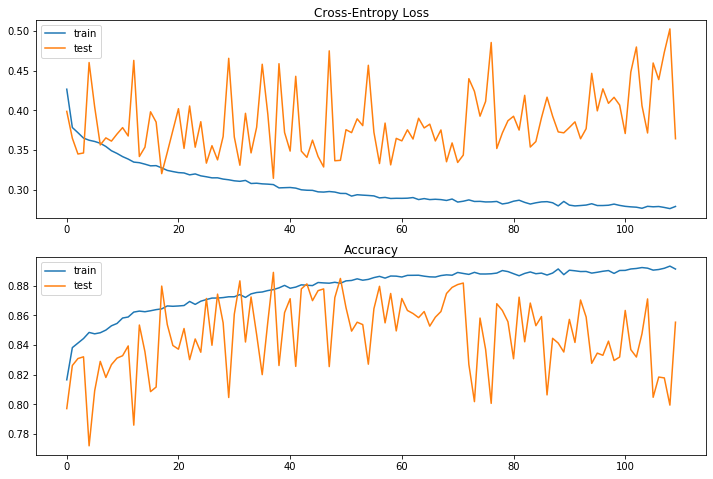

In [40]:
train_loss,train_acc=model.evaluate(Xtrain_scaled,y_train,verbose=0)
test_loss,test_acc=model.evaluate(Xtest_scaled,y_test,verbose=0)

print(' Accuracy(%) train vs test: ',round(train_acc*100,2),"-",round(test_acc*100,2))   
print(' Loss(%) train vs test: ',round(train_loss,2),"-",round(test_loss,2))

PlotModelEvaluation(history_model)


In [195]:
Xtest_scaled[:3]

array([[0.87870197, 0.89374894, 0.89230769, 0.8458237 , 0.86770083,
        0.89365672, 0.87340909, 0.88238283, 0.28421283, 0.31419508,
        0.40992204, 0.40934821, 0.83201741, 0.        , 0.        ,
        0.66666667, 0.33333333],
       [0.87862416, 0.89367003, 0.89230769, 0.8458237 , 0.86770083,
        0.89321773, 0.87340909, 0.88215697, 0.28370192, 0.31356067,
        0.41006378, 0.41889051, 0.83189125, 0.        , 0.        ,
        0.66666667, 0.33333333],
       [0.87855745, 0.89357984, 0.89230769, 0.8458237 , 0.86770083,
        0.89255926, 0.87340909, 0.88181818, 0.283264  , 0.31292625,
        0.41034727, 0.4284328 , 0.8319333 , 0.        , 0.        ,
        0.66666667, 0.33333333]])

In [196]:
yPredicted = model.predict_classes(Xtest_scaled)
#yPredicted = model.predict(Xtest_scaled)

predictions = [value for value in yPredicted]


print(predictions[:10])
print(y_test[:10])


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [197]:
if y_train.ndim==2:
 y_test = [numpy.argmax(y, axis=None, out=None) for y in y_test]
 print(y_test[:10])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [198]:
# evaluate predictions  
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 79.08%


# Create Prediction Result DataFrame

In [199]:
df_predictResult=pandas.DataFrame({'y_Actual':y_test,'y_Predicted':yPredicted.ravel()},index=df_test.index)
print(df_predictResult.shape)
df_predictResult.tail(5)

(7838, 2)


,y_Actual,y_Predicted
datetime,,
2020-06-10 15:45:00,1,1
2020-06-10 16:00:00,1,1
2020-06-10 16:15:00,1,1
2020-06-10 16:30:00,1,1
2020-06-10 16:45:00,1,1


In [200]:
yPredicted_prob = model.predict_proba(Xtest_scaled)
yPredicted_prob[:5]

array([[9.9973649e-01, 2.6350073e-04],
       [9.9973267e-01, 2.6732654e-04],
       [9.9972874e-01, 2.7130410e-04],
       [9.9972385e-01, 2.7618793e-04],
       [9.9971861e-01, 2.8138570e-04]], dtype=float32)

In [201]:
df_predictProb=pandas.DataFrame(data=yPredicted_prob,columns=['Prob_0','Prob_1'],index=df_test.index)
print(df_predictProb.shape)
df_predictProb.round(3).tail()

(7838, 2)


,Prob_0,Prob_1
datetime,,
2020-06-10 15:45:00,0.308,0.692
2020-06-10 16:00:00,0.304,0.696
2020-06-10 16:15:00,0.299,0.701
2020-06-10 16:30:00,0.295,0.705
2020-06-10 16:45:00,0.291,0.709


In [202]:
df_predictAll=pandas.concat([dfOHLC,df_predictResult,df_predictProb],axis=1)
df_predictAll.head()

,open,high,low,close,y_Actual,y_Predicted,Prob_0,Prob_1
datetime,,,,,,,,
2019-01-02 09:45:00,1039.0,1046.4,1038.2,1044.3,0,0,0.999736,0.000264
2019-01-02 10:00:00,1044.4,1045.0,1039.7,1041.7,0,0,0.999733,0.000267
2019-01-02 10:15:00,1041.7,1044.1,1041.6,1043.0,0,0,0.999729,0.000271
2019-01-02 10:30:00,1042.9,1047.0,1042.6,1045.0,0,0,0.999724,0.000276
2019-01-02 10:45:00,1045.3,1045.8,1043.7,1044.5,0,0,0.999719,0.000281


In [148]:
buildtime=datetime.now().strftime('%d%m%y_%H%M')

result_filename=f'{result_path}\\{strategyName}_MLP-_{modelHD_Title}_tn{st}-{ed}_ts{test_st}-{test_ed}_{buildtime}_resultB1.csv'

print(result_filename)

model_filename=f'{model_path}\\B1_{strategyName}_MLP_{modelHD_Title}_tn{st}-{ed}_ts{test_st}-{test_ed}_{buildtime}'
print(model_filename)



D:\JupyterCode\ML-S50F\Lab-S5-F-DNN\results\long_MLP-_17x17x0_epo105_btch32_tn2007-2018_ts2019-2020_030720_1553_resultB1.csv
D:\JupyterCode\ML-S50F\Lab-S5-F-DNN\models\B1_long_MLP_17x17x0_epo105_btch32_tn2007-2018_ts2019-2020_030720_1553


# save reulst as csv file

In [149]:
df_predictAll.to_csv(result_filename)

# save model and scaler individually

In [150]:

#actually prefer save model json
from pickle import dump
# save the model
dump(model, open(f'{model_filename}_Dump-Model.pkl', 'wb'))
# save the scaler
dump(scaler, open(f'{model_filename}_Dump-Scaler.pkl', 'wb'))